# Text Preprocessing

In [27]:
import pandas as pd
import re   
import nltk
import sys
import string

In [2]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
pip install Sastrawi 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 3.6 MB/s 


In [ ]:
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

Import Data

In [6]:
data = pd.read_excel("dataset_klaster.xlsx")
text = data['tweet']
print(data)

                                                 tweet
0    Hallo #TemanJNE , kami informasikan bahwa saat...
1    @JNECare @JNE_ID bener2 gamau ngirim paket gue...
2                        @JNECare tolong balas dm saya
3    @JNECare @JNE_ID , hati2 dong tiap kirim jtr p...
4    @Akbarfawzi @JNECare Iya coba wasap bar, ajari...
..                                                 ...
478  @JNECare @NonsubsidiX Gimana nihh stuck mulu g...
479                      @JNECare hallo, cek dm yaa ka
480                           @JNECare udah aku dm yaa
481  @akhmad_mufid @JNECare Saya 9 hari gak sampai ...
482  @JNECare halo JNE, paket yang saya kirim tertu...

[483 rows x 1 columns]


Removing Links

In [7]:
dataclearlink = []
for line in text:
  result = re.sub(r"http\S+"," ", line)
  dataclearlink.append(result)
  print(result)

Hallo #TemanJNE , kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter @JNECare. Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang #JNE #ConnectingHappiness #JNEBangkitBerdama #JNE32Tahun  #JNECare   tercantum di gambar.
@JNECare @JNE_ID bener2 gamau ngirim paket gue apa ya anjimmðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­
@JNECare tolong balas dm saya
@JNECare @JNE_ID , hati2 dong tiap kirim jtr paket selalu ancur . sedih tau berharap paket dtg baik2 aja tp malah gini . kejadian paket ancur udh sering bgt :(((  
@Akbarfawzi @JNECare Iya coba wasap bar, ajarin aku bar
@JNECare cek dm ya min ðŸ™
@JNECare Mau ambil paket di semarang, qmbilnya dimana yha ?
@saintisbae @JNECare Akhirnya gimana kak? Sampe ga? Sy juga gitu soalnya skrg
@JNECare @JNE_ID kok resinya gak bisa di chek ya?  
@JNECare nggak jadi. Barangnya udah dateng.
@fajarrusalem @JNECare Mas jar yg ngirim? Samperin aja mas nanti dikasi WA sama CSnya. Soalnya tiap daerah sekarang bisa chat 

Removing Hashtags

In [8]:
dataclearhastag = []
for line in dataclearlink :
  result = re.sub(r"#\S+", " ", line)
  dataclearhastag.append(result)
  print(result)

Hallo   , kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter @JNECare. Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang              tercantum di gambar.
@JNECare @JNE_ID bener2 gamau ngirim paket gue apa ya anjimmðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­
@JNECare tolong balas dm saya
@JNECare @JNE_ID , hati2 dong tiap kirim jtr paket selalu ancur . sedih tau berharap paket dtg baik2 aja tp malah gini . kejadian paket ancur udh sering bgt :(((  
@Akbarfawzi @JNECare Iya coba wasap bar, ajarin aku bar
@JNECare cek dm ya min ðŸ™
@JNECare Mau ambil paket di semarang, qmbilnya dimana yha ?
@saintisbae @JNECare Akhirnya gimana kak? Sampe ga? Sy juga gitu soalnya skrg
@JNECare @JNE_ID kok resinya gak bisa di chek ya?  
@JNECare nggak jadi. Barangnya udah dateng.
@fajarrusalem @JNECare Mas jar yg ngirim? Samperin aja mas nanti dikasi WA sama CSnya. Soalnya tiap daerah sekarang bisa chat WA, biar cepet difollow up
@JNECare CEK DM min. URGENT
@JNECare 

Removing the Retweet Symbol

In [9]:
dataclearrt = []
for line in dataclearhastag:
  result = re.sub(r"RT", " ", line)
  dataclearrt.append(result)
  print(result)

Hallo   , kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter @JNECare. Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang              tercantum di gambar.
@JNECare @JNE_ID bener2 gamau ngirim paket gue apa ya anjimmðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­
@JNECare tolong balas dm saya
@JNECare @JNE_ID , hati2 dong tiap kirim jtr paket selalu ancur . sedih tau berharap paket dtg baik2 aja tp malah gini . kejadian paket ancur udh sering bgt :(((  
@Akbarfawzi @JNECare Iya coba wasap bar, ajarin aku bar
@JNECare cek dm ya min ðŸ™
@JNECare Mau ambil paket di semarang, qmbilnya dimana yha ?
@saintisbae @JNECare Akhirnya gimana kak? Sampe ga? Sy juga gitu soalnya skrg
@JNECare @JNE_ID kok resinya gak bisa di chek ya?  
@JNECare nggak jadi. Barangnya udah dateng.
@fajarrusalem @JNECare Mas jar yg ngirim? Samperin aja mas nanti dikasi WA sama CSnya. Soalnya tiap daerah sekarang bisa chat WA, biar cepet difollow up
@JNECare CEK DM min. URGENT
@JNECare 

Removing Usernames

In [10]:
dataclearusername = []
for line in dataclearrt:
  result = re.sub(r"@\S+", " ", line)
  dataclearusername.append(result)
  print(result)

Hallo   , kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter   Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang              tercantum di gambar.
    bener2 gamau ngirim paket gue apa ya anjimmðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­
  tolong balas dm saya
    , hati2 dong tiap kirim jtr paket selalu ancur . sedih tau berharap paket dtg baik2 aja tp malah gini . kejadian paket ancur udh sering bgt :(((  
    Iya coba wasap bar, ajarin aku bar
  cek dm ya min ðŸ™
  Mau ambil paket di semarang, qmbilnya dimana yha ?
    Akhirnya gimana kak? Sampe ga? Sy juga gitu soalnya skrg
    kok resinya gak bisa di chek ya?  
  nggak jadi. Barangnya udah dateng.
    Mas jar yg ngirim? Samperin aja mas nanti dikasi WA sama CSnya. Soalnya tiap daerah sekarang bisa chat WA, biar cepet difollow up
  CEK DM min. URGENT
  min tolong cek dm tq
  paket kakak saya dg resi 350640000830722 kok gak sampaiÂ² ya, malah muterÂ² di jateng, padahal dari kediri tujuan Bojon

Removing Figures

In [11]:
dataclearangka = []
for line in dataclearusername :
  result = re.sub("\d", " ", line)
  dataclearangka.append(result)
  print(result)

Hallo   , kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter   Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang              tercantum di gambar.
    bener  gamau ngirim paket gue apa ya anjimmðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­
  tolong balas dm saya
    , hati  dong tiap kirim jtr paket selalu ancur . sedih tau berharap paket dtg baik  aja tp malah gini . kejadian paket ancur udh sering bgt :(((  
    Iya coba wasap bar, ajarin aku bar
  cek dm ya min ðŸ™
  Mau ambil paket di semarang, qmbilnya dimana yha ?
    Akhirnya gimana kak? Sampe ga? Sy juga gitu soalnya skrg
    kok resinya gak bisa di chek ya?  
  nggak jadi. Barangnya udah dateng.
    Mas jar yg ngirim? Samperin aja mas nanti dikasi WA sama CSnya. Soalnya tiap daerah sekarang bisa chat WA, biar cepet difollow up
  CEK DM min. URGENT
  min tolong cek dm tq
  paket kakak saya dg resi                 kok gak sampaiÂ² ya, malah muterÂ² di jateng, padahal dari kediri tujuan Bojon

Removing Emoticons

In [12]:
dataclearemoticon = []
for line in dataclearangka :
  result = re.sub(r'<.*?>', " ", line)
  dataclearemoticon.append(result)
  print(result)

Hallo   , kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter   Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang              tercantum di gambar.
    bener  gamau ngirim paket gue apa ya anjimmðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­
  tolong balas dm saya
    , hati  dong tiap kirim jtr paket selalu ancur . sedih tau berharap paket dtg baik  aja tp malah gini . kejadian paket ancur udh sering bgt :(((  
    Iya coba wasap bar, ajarin aku bar
  cek dm ya min ðŸ™
  Mau ambil paket di semarang, qmbilnya dimana yha ?
    Akhirnya gimana kak? Sampe ga? Sy juga gitu soalnya skrg
    kok resinya gak bisa di chek ya?  
  nggak jadi. Barangnya udah dateng.
    Mas jar yg ngirim? Samperin aja mas nanti dikasi WA sama CSnya. Soalnya tiap daerah sekarang bisa chat WA, biar cepet difollow up
  CEK DM min. URGENT
  min tolong cek dm tq
  paket kakak saya dg resi                 kok gak sampaiÂ² ya, malah muterÂ² di jateng, padahal dari kediri tujuan Bojon

Removing New Lines

In [13]:
dataclearline = []
for line in dataclearemoticon :
  result = re.sub("\n", " ", line)
  dataclearline.append(result)
  print(result)

Hallo   , kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter   Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang              tercantum di gambar.
    bener  gamau ngirim paket gue apa ya anjimmðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­
  tolong balas dm saya
    , hati  dong tiap kirim jtr paket selalu ancur . sedih tau berharap paket dtg baik  aja tp malah gini . kejadian paket ancur udh sering bgt :(((  
    Iya coba wasap bar, ajarin aku bar
  cek dm ya min ðŸ™
  Mau ambil paket di semarang, qmbilnya dimana yha ?
    Akhirnya gimana kak? Sampe ga? Sy juga gitu soalnya skrg
    kok resinya gak bisa di chek ya?  
  nggak jadi. Barangnya udah dateng.
    Mas jar yg ngirim? Samperin aja mas nanti dikasi WA sama CSnya. Soalnya tiap daerah sekarang bisa chat WA, biar cepet difollow up
  CEK DM min. URGENT
  min tolong cek dm tq
  paket kakak saya dg resi                 kok gak sampaiÂ² ya, malah muterÂ² di jateng, padahal dari kediri tujuan Bojon

Removing Punctuation

In [14]:
dataclearpunctuation = []
for line in dataclearline :
  result = re.sub(r"[^\w\s]", " ", line)
  dataclearpunctuation.append(result)
  print(result)

Hallo     kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter   Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang              tercantum di gambar 
    bener  gamau ngirim paket gue apa ya anjimmðŸ  ðŸ  ðŸ  ðŸ  ðŸ  ðŸ  
  tolong balas dm saya
      hati  dong tiap kirim jtr paket selalu ancur   sedih tau berharap paket dtg baik  aja tp malah gini   kejadian paket ancur udh sering bgt       
    Iya coba wasap bar  ajarin aku bar
  cek dm ya min ðŸ  
  Mau ambil paket di semarang  qmbilnya dimana yha  
    Akhirnya gimana kak  Sampe ga  Sy juga gitu soalnya skrg
    kok resinya gak bisa di chek ya   
  nggak jadi  Barangnya udah dateng 
    Mas jar yg ngirim  Samperin aja mas nanti dikasi WA sama CSnya  Soalnya tiap daerah sekarang bisa chat WA  biar cepet difollow up
  CEK DM min  URGENT
  min tolong cek dm tq
  paket kakak saya dg resi                 kok gak sampaiÂ² ya  malah muterÂ² di jateng  padahal dari kediri tujuan Bojon

Removing Excess Spacing

In [15]:
datacleardoublespace = []
for line in dataclearpunctuation :
  result=re.sub(r'\s+', ' ', line)
  datacleardoublespace.append(result)
  print(result)

Hallo kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang tercantum di gambar 
 bener gamau ngirim paket gue apa ya anjimmðŸ ðŸ ðŸ ðŸ ðŸ ðŸ 
 tolong balas dm saya
 hati dong tiap kirim jtr paket selalu ancur sedih tau berharap paket dtg baik aja tp malah gini kejadian paket ancur udh sering bgt 
 Iya coba wasap bar ajarin aku bar
 cek dm ya min ðŸ 
 Mau ambil paket di semarang qmbilnya dimana yha 
 Akhirnya gimana kak Sampe ga Sy juga gitu soalnya skrg
 kok resinya gak bisa di chek ya 
 nggak jadi Barangnya udah dateng 
 Mas jar yg ngirim Samperin aja mas nanti dikasi WA sama CSnya Soalnya tiap daerah sekarang bisa chat WA biar cepet difollow up
 CEK DM min URGENT
 min tolong cek dm tq
 paket kakak saya dg resi kok gak sampaiÂ² ya malah muterÂ² di jateng padahal dari kediri tujuan Bojonegoro sama jatim Tolong di cek min paket dokumen penting 
 tolong balas chat saya dong paket gk 

Removing Underscores

In [16]:
dataclearunderscore = []
for line in datacleardoublespace :
  result = re.sub(r"\S+_", " ", line)
  dataclearunderscore.append(result)
  print(result)

Hallo kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada Twitter Layanan Customer Service dapat diakses melalui Call Center Facebook dan email yang tercantum di gambar 
 bener gamau ngirim paket gue apa ya anjimmðŸ ðŸ ðŸ ðŸ ðŸ ðŸ 
 tolong balas dm saya
 hati dong tiap kirim jtr paket selalu ancur sedih tau berharap paket dtg baik aja tp malah gini kejadian paket ancur udh sering bgt 
 Iya coba wasap bar ajarin aku bar
 cek dm ya min ðŸ 
 Mau ambil paket di semarang qmbilnya dimana yha 
 Akhirnya gimana kak Sampe ga Sy juga gitu soalnya skrg
 kok resinya gak bisa di chek ya 
 nggak jadi Barangnya udah dateng 
 Mas jar yg ngirim Samperin aja mas nanti dikasi WA sama CSnya Soalnya tiap daerah sekarang bisa chat WA biar cepet difollow up
 CEK DM min URGENT
 min tolong cek dm tq
 paket kakak saya dg resi kok gak sampaiÂ² ya malah muterÂ² di jateng padahal dari kediri tujuan Bojonegoro sama jatim Tolong di cek min paket dokumen penting 
 tolong balas chat saya dong paket gk 

Case Folding

In [17]:
datalower = []
for line in dataclearunderscore:
  result = line.lower()
  datalower.append(result)
  print(result)

hallo kami informasikan bahwa saat ini sedang dilakukan optimalisasi pada twitter layanan customer service dapat diakses melalui call center facebook dan email yang tercantum di gambar 
 bener gamau ngirim paket gue apa ya anjimmðÿ ðÿ ðÿ ðÿ ðÿ ðÿ 
 tolong balas dm saya
 hati dong tiap kirim jtr paket selalu ancur sedih tau berharap paket dtg baik aja tp malah gini kejadian paket ancur udh sering bgt 
 iya coba wasap bar ajarin aku bar
 cek dm ya min ðÿ 
 mau ambil paket di semarang qmbilnya dimana yha 
 akhirnya gimana kak sampe ga sy juga gitu soalnya skrg
 kok resinya gak bisa di chek ya 
 nggak jadi barangnya udah dateng 
 mas jar yg ngirim samperin aja mas nanti dikasi wa sama csnya soalnya tiap daerah sekarang bisa chat wa biar cepet difollow up
 cek dm min urgent
 min tolong cek dm tq
 paket kakak saya dg resi kok gak sampaiâ² ya malah muterâ² di jateng padahal dari kediri tujuan bojonegoro sama jatim tolong di cek min paket dokumen penting 
 tolong balas chat saya dong paket gk 

Stemming

In [21]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [26]:
#Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data_stemmed = map(lambda x: stemmer.stem(x), datalower)
datastemmed = list(data_stemmed)
datastemmed

factory = StemmerFactory()
stemmer = factory.create_stemmer()
datastemmed = map(lambda x: stemmer.stem(x), datalower)
databersih = map(lambda x: x.translate(str.maketrans('','', string.punctuation)), datastemmed)
databersih = list(databersih)

Stopwords and Tokenizing

In [29]:
import nltk
nltk.download('punkt')
stopwords = open("stopword.txt",'r').read()
satudata = []
datafinal = []
df = []

for line in databersih:
    wo = word_tokenize(line)
    wo = [word for word in wo if not word in stopwords and not word[0].isdigit()]
    datafinal.append(wo)
    df.append(" ".join(wo))
for l in datafinal:
     satudata+= l
final={v: satudata.count(v) for v in set(satudata)}

import csv
with open ('final.csv','w',newline="") as csv_file:
    writer = csv.writer(csv_file)
    for key, value in final.items(): 
        writer.writerow([key, value])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
import numpy as np
data2 = pd.DataFrame(np.array(df))
data2
data2.to_csv("df.csv")

Count Vectorize

In [31]:
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit_transform(df)

DTM = vectorizer.fit_transform(df)

Term Frequency-Inverse Document Frequency (TF-IDF)

In [32]:
vectorizer = TfidfVectorizer(min_df=0, max_df=1)
TFIDF = vectorizer.fit_transform(df)
TFIDF_=pd.DataFrame(TFIDF.toarray(),columns=vectorizer.get_feature_names_out())
TFIDF_.to_csv("dataset_klaster_TFIDI.csv")

# Wordcloud

In [33]:
from wordcloud import STOPWORDS
import pandas as pd
import re
import nltk
import sys
import string

In [38]:
X = pd.read_csv("dataset_klaster_TFIDI.csv",sep=",")

In [39]:
data = pd.read_csv("dataset_klaster_TFIDI.csv",sep=",")
print(data)

     Unnamed: 0  aamiin  abis  acara  aceh  adisty  aduuuuuh   ae  \
0             0     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
1             1     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
2             2     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
3             3     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
4             4     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
..          ...     ...   ...    ...   ...     ...       ...  ...   
478         478     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
479         479     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
480         480     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
481         481     0.0   0.0    0.0   0.0     0.0       0.0  0.0   
482         482     0.0   0.0    0.0   0.0     0.0       0.0  0.0   

     ahahahahaha  ajaa  ...  yakale  yakali  yas       ybs  yerima  yeuuu  \
0            0.0   0.0  ...     0.0     0.0  0.0  0.000000     0.0    0.0   
1            0.0 

In [40]:
datastr1 = str(data)
datagab1 = re.sub(r"'","", datastr1)

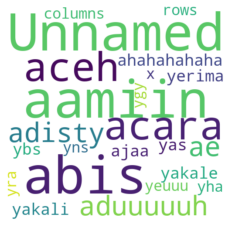

In [42]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud 
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(datagab1)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

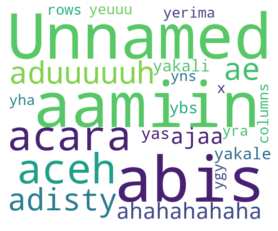

In [44]:
from PIL import Image
import numpy as np

mask = np.array(Image.open('Twitter-logo.png'))
wc = WordCloud(stopwords=STOPWORDS, mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(datagab1)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('twitter2.png', dpi=1800)
plt.show()

# Text Clustering (K-Means)

In [45]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import pandas as pd


In [50]:
X = pd.read_csv("dataset_klaster_TFIDI.csv",sep=";")

In [51]:
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np

K-Means Algorithm

In [52]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_
metrics.calinski_harabasz_score(X, labels)

for k in range(2, 21):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans.labels_
    print(k, metrics.calinski_harabasz_score(X, labels))

2 2.044641205233249
3 2.044641205233249
4 2.044641205233249
5 2.044641205233249
6 2.044641205233249
7 2.044641205233249
8 2.044641205233249
9 2.044641205233249
10 2.044641205233249
11 2.044641205233249
12 2.044641205233249
13 2.044641205233249
14 2.044641205233249
15 2.044641205233249
16 2.044641205233249
17 2.044641205233249
18 2.044641205233249
19 2.044641205233249
20 2.044641205233249


In [53]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

Silhouette Value

In [54]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_

for k in range(2,21):
    kmeans = KMeans(n_clusters = k, random_state=1).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print(k, sil_coeff)

2 0.3326154048950532
3 0.33299757151313564
4 0.3333813338164709
5 0.33376670181982004
6 0.3341536856219255
7 0.3345422954063926
8 0.3349325414425839
9 0.3353244340865228
10 0.33571798378181034
11 0.33611320106055237
12 0.3365100965442997
13 0.3369086809449993
14 0.3373089650659577
15 0.3377109598028175
16 0.33811467614454604
17 0.33852012517443675
18 0.3389273180711225
19 0.33933626610960427
20 0.33974698066229125


Word Cloud Every Cluster

In [59]:
import csv
input_df=pd.DataFrame(data=X)
matrix = pd.read_csv("dataset_klaster_TFIDI.csv",sep=";")

In [56]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import joblib
num_clusters = 3
km = KMeans(n_clusters = num_clusters, random_state=1)
%time km.fit(matrix)
clusters = km.labels_.tolist()
y_kmeans = km.predict(matrix)
input_df['klaster']=pd.Series(y_kmeans, index=input_df.index)




CPU times: user 160 ms, sys: 62.1 ms, total: 222 ms
Wall time: 135 ms


Number of Words per Cluster

In [68]:
import joblib
joblib.dump(km, 'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()
clusters_df = pd.DataFrame(clusters)
clusters_df['klaster'] = pd.DataFrame(clusters)
clusters_df['klaster'].value_counts()

0    481
1      1
2      1
Name: klaster, dtype: int64

In [69]:
import csv
train_final_df=pd.read_csv("df (1).csv")
train_final_df.columns = ['text']
train_final_df['klaster']=pd.Series(y_kmeans, 
index=input_df.index)
print(train_final_df)

                                                  text  klaster
0    hallo informasi optimalisasi twitter layan cus...        0
1                  bener gamau ngirim paket gue anjimm        0
2                                      tolong balas dm        0
3    hati kirim jtr paket ancur sedih harap paket d...        0
4                                iya coba wasap ajarin        0
..                                                 ...      ...
471  gimana nihh stuck mulu maju nyaman semarang gi...        0
472                                       hallo cek dm        0
473                                                 dm        0
474                          gerak bro mending pake yg        0
475  halo jne paket kirim tulis tracking terima ybs...        0

[476 rows x 2 columns]


In [70]:
cluster1 = train_final_df[train_final_df['klaster'] == 0 ]
cluster1_f = cluster1['text']
cluster2 = train_final_df[train_final_df['klaster'] == 1 ]
cluster2_f = cluster2['text']
cluster3 = train_final_df[train_final_df['klaster'] == 2 ]
cluster3_f = cluster3['text']

In [71]:
a = []
b = []
for l in b:
 a+= l
final={v: a.count(v) for v in set(a)}
c = []
d = []
for l in d:
 c+= l
final={v: c.count(v) for v in set(c)}
datastr1 = str(cluster1_f)
datagab1 = re.sub(r"'","", datastr1)
datastr2 = str(cluster2_f)
datagab2 = re.sub(r"'","", datastr2)
datastr3 = str(cluster3_f)
datagab3 = re.sub(r"'","", datastr3)

In [72]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['font.size']=12 #10
mpl.rcParams['savefig.dpi']=100 #72
mpl.rcParams['figure.subplot.bottom']=.1
stopwords=open('stopword.txt', 'r').read()

Word Cloud Cluster 1

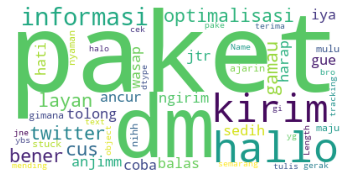

In [73]:
wordcloud = WordCloud(collocations = False,
 background_color='white',
stopwords=stopwords,
 max_words=50,
 max_font_size=500,
 random_state=42
 ).generate(datagab1)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Cluster 1 JNE.png", dpi=900)

Word Cloud Cluster 2

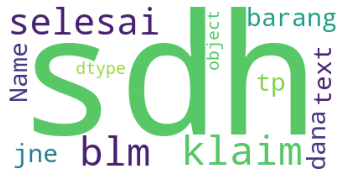

In [74]:
wordcloud = WordCloud(collocations = False,
 background_color='white',
 stopwords=stopwords,
 max_words=50,
 max_font_size=200,
 random_state=42
 ).generate(datagab2)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Cluster 2 JNE.png", dpi=900)

Word Cloud Cluster 3

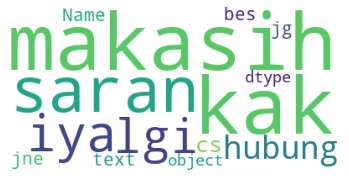

In [75]:
wordcloud = WordCloud(collocations = False,
 background_color='white',
 stopwords=stopwords,
 max_words=50,
 max_font_size=200,
 random_state=42
 ).generate(datagab3)
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Cluster 3 JNE.png", dpi=900)

# Text Clasification (K-Nn)

In [80]:
data_clean = pd.read_csv('df (1).csv', sep=";",encoding='latin1')
data_clean.head()

,text,class
0,hallo informasi optimalisasi twitter layan cus...,POSITIF
1,bener gamau ngirim paket gue anjimm,NEGATIF
2,tolong balas dm,NEGATIF
3,hati kirim jtr paket ancur sedih harap paket d...,NEGATIF
4,iya coba wasap ajarin,NEGATIF


In [89]:
data_clean = data_clean.astype({'class' : 'category'})
data_clean = data_clean.astype({'text' : 'string'})
data_clean.dtypes

text       string
class    category
dtype: object

In [90]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['class'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['class'].astype('U'))
print(text_tf)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (458, 0)	1.0
  (459, 0)	1.0
  (460, 0)	1.0
  (461, 0)	1.0
  (462, 0)	1.0
  (463, 0)	1.0
  (464, 0)	1.0
  (465, 0)	1.0
  (466, 0)	1.0
  (467, 0)	1.0
  (468, 0)	1.0
  (469, 0)	1.0
  (470, 0)	1.0
  (471, 0)	1.0
  (472, 0)	1.0
  (473, 0)	1.0
  (474, 0)	1.0
  (475, 0)	1.0
  (476, 0)	1.0
  (477, 0)	1.0
  (478, 0)	1.0
  (479, 1)	1.0
  (480, 1)	1.0
  (481, 1)	1.0
  (482, 1)	1.0


In [86]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1. 0. 0. ... 1. 1. 1.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]]


In [94]:
# splitting data 
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['class'], test_size=0.2, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['class'].value_counts()

Jumlah Data Uji: (97, 483)
Jumlah Data Latih: (386, 483)
Jumlah data uji dengan sentimen positif: 38
Jumlah data uji dengan sentimen negatif: 59
Jumlah data latih dengan sentimen positif: 214
Jumlah data latih dengan sentimen negatif: 172


POSITIF    252
NEGATIF    231
Name: class, dtype: int64

Perform algoritma KNN 

In [95]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))


confusion matrix:
 [[59  0]
 [ 0 38]]

TN: 59
FP: 0
FN: 0
TP: 38
              precision    recall  f1-score   support

     NEGATIF       1.00      1.00      1.00        59
     POSITIF       1.00      1.00      1.00        38

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1_score: 1.0
error_rate: 0.0


In [98]:
# splitting data 70:30
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['class'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['class'].value_counts()

Jumlah Data Uji: (145, 483)
Jumlah Data Latih: (338, 483)
Jumlah data uji dengan sentimen positif: 57
Jumlah data uji dengan sentimen negatif: 88
Jumlah data latih dengan sentimen positif: 195
Jumlah data latih dengan sentimen negatif: 143


POSITIF    252
NEGATIF    231
Name: class, dtype: int64

In [99]:
# perform algoritma
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))


knn Accuracy: 1.0
knn Precision: 1.0
knn Recall: 1.0
knn f1_score: 1.0
confusion matrix:
 [[88  0]
 [ 0 57]]

              precision    recall  f1-score   support

     NEGATIF       1.00      1.00      1.00        88
     POSITIF       1.00      1.00      1.00        57

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



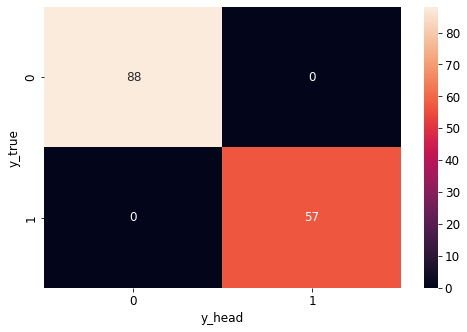

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
tn, fp, fn, tp

(88, 0, 0, 57)

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, cos_sim, data_clean['class'], cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [106]:
cross_val_score(knn, cos_sim, data_clean['class'], cv=10).mean()

1.0